In [1]:
import os
import sys
import pandas as pd
import re
from PIL import Image
import requests
from io import BytesIO
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from numpy import dot
from numpy.linalg import norm
%matplotlib inline

In [2]:
file_path = "/home/jugs/Downloads/mymall_datafeed new.xlsx" # mymall_datafeed new.xlsx"

In [3]:
data = pd.read_excel(file_path, sheet_name='Sheet2')

In [4]:
print("Format of Items")
data.head()

Format of Items


,ID,商品名稱,商品價格,URL,圖片URL,主敘述
0,14974,NOW健而婷－MACA瑪卡男性專用(100顆/瓶),899,http://www.mymall.com.tw/pro-14974.html,https://img.oeya.com/website/upload/photos/201...,美國原裝進口\r\n豐富胺基酸、B群、礦物質\r\n青春活力 ，精神旺盛\r\n調節男性生理機能
1,15004,NOW健而婷 濃縮蜂王漿(100顆/瓶),975,http://www.mymall.com.tw/pro-15004.html,https://img.oeya.com/website/upload/photos/201...,美國原裝進口\r\n珍貴癸烯酸(10-HDA)高達6％\r\n高純度新鮮蜂王漿濃縮\r\n冷...
2,15012,NOW健而婷 高效亞麻仁油(100顆/瓶),980,http://www.mymall.com.tw/pro-15012.html,https://img.oeya.com/website/upload/photos/201...,美國原裝進口\r\n冷壓製成，活性保留\r\n促進代謝，健康養生\r\n嚴選亞麻仁籽，經QA...
3,15028,<b><font color=red>補氣強身好精神</font></b>NOW健而婷 有氧...,750,http://www.mymall.com.tw/pro-15028.html,https://img.oeya.com/website/upload/photos/201...,美國原裝進口\r\n天天活力的泉源\r\n上班族：精神奕奕的秘密武器 \r\n學生族：課業加...
4,15039,NOW健而婷－全方位植物酵素(120顆/瓶),1075,http://www.mymall.com.tw/pro-15039.html,https://img.oeya.com/website/upload/photos/201...,美國原裝進口\r\n忙碌外食族必備\r\n複方添加，8酵合1\r\n幫助消化、排便順暢\r\...


In [5]:
print("Total Items in a catalog: " , len(data))

Total Items in a catalog:  2570


In [6]:
mymalldata = list(data)
print("The header column")
print(mymalldata)


The header column
['ID', '商品名稱', '商品價格', 'URL', '圖片URL', '主敘述']


In [7]:
class MyMall:
    def __init__(self, sku, title, price, itemurl, imageurl, description, embeddings, similarskus):
        self.sku = sku
        self.title = title
        self.price = price
        self.itemurl = itemurl
        self.imageurl = imageurl
        self.description = description
        self.embeddings = embeddings
        self.similarskus = []

In [8]:
mymallLst = []

for count in range(len(data)):
    title = "" 
    sku = ""
    price = ""
    itemurl = ""
    pictureurl = ""
    description = ""
    embeddings = np.zeros([1,768])
    for head in mymalldata:
        if head == "ID":
            sku = data[head][count]
        if head == "商品名稱":
            title = re.sub(r'\<(.*?)\>', '' ,data[head][count].strip())
        if head == "商品價格":
            price = data[head][count]
        if head == "URL":
            itemurl = data[head][count]
        if head == "圖片URL":
            pictureurl = data[head][count]
        if head == "主敘述":
            description = re.sub(r'\<(.*?)\>' , '',str(data[head][count]))
            description = re.sub(r'[《》| 【】| ◆ | () | \- | ● |↘|★|▼|■|☆|▉|◎|>|＊|?|█|※|．| *\b]', ' ', description.strip())
            description = re.sub('\n|\r', '', description)
        embeddings = np.zeros([1,768])
        similarskus = []
#         print(sku , ": ", title, ": ", price, ": " + pictureurl + ": " + description)
        mymallobj = MyMall(sku, title, price, itemurl, pictureurl, description, embeddings, similarskus)
    mymallLst.append(mymallobj)

In [9]:
zeroPrice = []
for mymallitem in mymallLst:
    if mymallitem.price <= 0:
        zeroPrice.append(mymallitem.sku)
print("Items with no price:\nSKU's: ",zeroPrice)

Items with no price:
SKU's:  [28951, 28953, 40420, 33700, 42764, 33416, 33417, 33419, 33420, 33423, 33424, 35896, 35897, 35962, 37703, 37704, 37705, 37706, 37707, 37708, 37713, 37714, 37715, 38004, 35736, 42364, 34944, 41978, 21347]


In [10]:
emptydescription = []
for mymallitem in mymallLst:
    if mymallitem.description == "":
        emptydescription.append(mymallitem.sku)
print("Items with empty/no description:\nSKU's: ",len(emptydescription))

Items with empty/no description:
SKU's:  44


In [11]:

descriptionlessthan10 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 0 and len(mymallitem.description) <= 10:
        descriptionlessthan10.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan10))

Items with very short or no description:
SKU's 272


In [12]:
print("Items with description 10 to 20 in length\n")
descriptionlessthan20 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 10 and len(mymallitem.description) <= 20:
        descriptionlessthan20.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with more than 10 and less or equal to 20 description:\nSKU's", len(descriptionlessthan20))


Items with description 10 to 20 in length

Items with more than 10 and less or equal to 20 description:
SKU's 292


In [13]:
print("Items with description 20 to 30 in length\n")
descriptionlessthan30 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 20 and len(mymallitem.description) <= 30:
        descriptionlessthan30.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan30))

Items with description 20 to 30 in length

Items with very short or no description:
SKU's 198


In [14]:
print("Items with description 30 to 40 in length\n")
descriptionlessthan40 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 30 and len(mymallitem.description) <= 40:
        descriptionlessthan40.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan40))

Items with description 30 to 40 in length

Items with very short or no description:
SKU's 208


In [15]:
print("Items with description 40 to 50 in length\n")
descriptionlessthan50 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 40 and len(mymallitem.description) <= 50:
        descriptionlessthan50.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan50))

Items with description 40 to 50 in length

Items with very short or no description:
SKU's 250


In [16]:
print("Items with description 50 to 100 in length\n")
descriptionlessthan100 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 50 and len(mymallitem.description) <= 100:
        descriptionlessthan100.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan100))

Items with description 50 to 100 in length

Items with very short or no description:
SKU's 918


In [17]:
print("Items with description 100 to 200 in length\n")
descriptionlessthan200 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 100 and len(mymallitem.description) <= 200:
        descriptionlessthan200.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan200))

Items with description 100 to 200 in length

Items with very short or no description:
SKU's 358


In [18]:
print("Items with description 200 to 300 in length\n")
descriptionlessthan300 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 200 and len(mymallitem.description) <= 300:
        descriptionlessthan300.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan300))

Items with description 200 to 300 in length

Items with very short or no description:
SKU's 24


In [19]:
print("Items with description 300 to 400 in length\n")
descriptionlessthan400 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 300 and len(mymallitem.description) <= 400:
        descriptionlessthan400.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionlessthan400))

Items with description 300 to 400 in length

Items with very short or no description:
SKU's 2


In [20]:
print("Items with description more than 400 in length\n")
descriptionmorethan400 = []
for mymallitem in mymallLst:
    if len(mymallitem.description) > 400:
        descriptionmorethan400.append(mymallitem.sku)
#         print(mymallitem.sku, ":" , mymallitem.description)
print("Items with very short or no description:\nSKU's", len(descriptionmorethan400))

Items with description more than 400 in length

Items with very short or no description:
SKU's 4


[44, 272, 292, 198, 208, 250, 918, 358, 24, 2, 4]


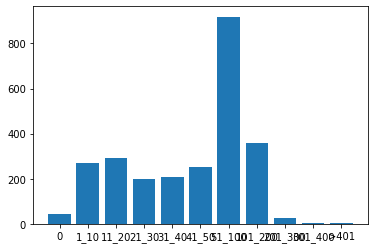

In [21]:
descRange = []
descRange.append(len(emptydescription))
descRange.append(len(descriptionlessthan10))
descRange.append(len(descriptionlessthan20))
descRange.append(len(descriptionlessthan30))
descRange.append(len(descriptionlessthan40))
descRange.append(len(descriptionlessthan50))
descRange.append(len(descriptionlessthan100))
descRange.append(len(descriptionlessthan200))
descRange.append(len(descriptionlessthan300))
descRange.append(len(descriptionlessthan400))
descRange.append(len(descriptionmorethan400))

print(descRange)

fig, ax = plt.subplots()
names = ['0', '1_10', '11_20', '21_30', '31_40', '41_50', '51_100', 
               '101_200','201_300','301_400', '>401']

plt.bar(names, descRange)
plt.show()


In [22]:
def show_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    imshow(img)

15041
NOW健而婷 高效蜂膠萃取(100顆/瓶)
http://www.mymall.com.tw/pro-15041.html
美國原裝進口來自巴西無污染原始森林豐富黃酮類調整體質5:1萃取濃縮蜂膠 ，不含酒精每顆含３００毫克
(1, 768)
[]


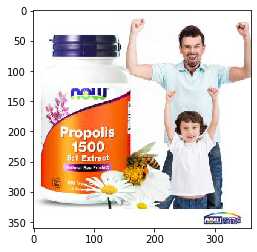

In [23]:
#  sku, title, price, itemurl, imageurl, description, similarskus
i = 0
for mymall in mymallLst:
    if i == 5:
        print(mymall.sku)
        print(mymall.title)
        print(mymall.itemurl)
        show_image(mymall.imageurl)
        print(mymall.description)
        print(mymall.embeddings.shape)
        print(mymall.similarskus)
    i = i+1

In [ ]:
# Now for the embedding

In [24]:
import tensorflow as tf
from bert_serving.client import BertClient

/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-pack

In [25]:
description = []
for mymall in mymallLst:
    line = ""
    line = mymall.title
    line = line + " " + mymall.description
    description.append(re.sub('\r|\n','',line))

In [26]:
print(description[1])
print(description[144])
print(description[453])

NOW健而婷 濃縮蜂王漿(100顆/瓶) 美國原裝進口珍貴癸烯酸 10 HDA 高達6％高純度新鮮蜂王漿濃縮冷凍乾燥技術，活性穩定
Magic Gene 綠瑪黛萃取(90顆/瓶)三瓶組-到期日2020/03/31 高單位600毫克瑪黛茶炸煎炒 美食好夥伴增進代謝好清爽美國原裝進口高規格GMP廠製造
【ECHAIN TECH】熊掌超人PMD驅蚊貼片-香茅香味 (10包/360片) 全新配方~尤加利驅蚊更有力  與日本技術合作,台灣生產  精萃天然PMD配方驅蚊更有力  SGS檢驗通過不含有害物質  外出郊遊、運動露營必備品  無油墨環保 熊掌立體圖騰


In [51]:
# Export only text
with open('mymallDesc.txt', 'w') as descfile:
    for line in description:
        descfile.write(line + '\n')
    descfile.close()

In [27]:
bc = BertClient()

In [28]:
encoded_desc = bc.encode(description)

/home/jugs/anaconda3/envs/myenv/lib/python3.6/site-packages/bert_serving/client/__init__.py:299: UserWarning: some of your sentences have more tokens than "max_seq_len=25" set on the server, as consequence you may get less-accurate or truncated embeddings.
here is what you can do:
- disable the length-check by create a new "BertClient(check_length=False)" when you do not want to display this warning
- or, start a new server with a larger "max_seq_len"
  '- or, start a new server with a larger "max_seq_len"' % self.length_limit)


In [29]:
len(encoded_desc)

2570

In [30]:
encoded_desc.shape

(2570, 768)

In [31]:
encoded_desc[2044].shape

(768,)

In [32]:
for i, item in enumerate(mymallLst):
    item.embeddings = encoded_desc[i]

In [52]:
mymallLst[110].embeddings

array([ 7.18676686e-01,  1.57989278e-01,  9.70694423e-03,  1.56308100e-01,
       -6.27580658e-02, -5.92740119e-01,  2.21694827e-01,  7.66773760e-01,
       -5.02357520e-02,  2.15368420e-01,  3.39722663e-01, -1.41663656e-01,
        5.44224441e-01,  1.44616542e-02,  9.28182960e-01,  1.36565134e-01,
        5.93661785e-01,  5.03045261e-01,  8.99079382e-01,  5.63453913e-01,
        2.87991971e-01,  3.60192537e-01, -2.01116353e-01, -4.00553308e-02,
        6.68766722e-02, -4.13079917e-01,  4.93204623e-01, -1.47748828e-01,
       -2.03260779e-01,  1.08834580e-01,  3.33499640e-01, -1.53557613e-01,
       -6.93094432e-01,  3.01922768e-01,  1.48423493e-01, -2.43749499e-01,
        9.32644084e-02,  8.67526233e-02, -2.81661361e-01, -1.44094313e-02,
        1.97826475e-01,  6.90413117e-01, -9.27953899e-01,  1.04370728e-01,
        3.37408841e-01, -4.99008186e-02,  2.94363707e-01, -1.09487101e-01,
       -5.65721989e-01, -6.72320485e-01, -5.24714530e-01,  1.05522432e+01,
        3.56484145e-01,  

In [34]:
def cos_sim(a, b):
    return dot(a, b)/(norm(a)*norm(b))

In [37]:
import operator
def get_topn_items(scoresSku, n =30):
    sorted(scoresSku.items(), reverse=True, key = operator.itemgetter(1) )
    skus = []
    i = 0
    for key, value in scoresSku.items():
        if i <= n:
            skus.append(key)
            i = i + 1
    return skus

In [38]:
for i, targetitem in enumerate(mymallLst):
    scoresSkus = {}
    for j, otheritem in enumerate(mymallLst):
        if targetitem.sku != otheritem.sku:
            score = cos_sim(targetitem.embeddings , otheritem.embeddings)
#             print(targetitem.embeddings.shape)
            scoresSkus[otheritem.sku] = score
    targetitem.similarskus = get_topn_items(scoresSkus)

In [ ]:
import json
jsonmymall = {}
for item in mymallLst:
    jsonmymall['sku'] = item.sku
    jsonmymall['title'] = item.title
    jsonmymall['imageurl'] = item.imageurl
    jsonmymall['description'] = item.description
    jsonmymall['similarskus'] = item.similarskus
    

with open('mymalldata.json')

In [54]:
print(mymallLst[100].similarskus)

[14974, 15004, 15012, 15028, 15039, 15041, 15044, 15067, 15076, 15078, 15079, 15081, 15083, 15085, 15088, 15096, 15099, 15104, 15107, 15108, 15110, 15122, 15126, 15139, 15147, 15183, 15189, 15194, 15196, 15198, 15201]


In [46]:
for item in mymallLst:
    if item.sku == 15189:
        print(item.title , ":" , item.description)
        a = item.embeddings

NOW健而婷 啤酒酵母(200顆/瓶) : 美國原裝進口植物蛋白質，又稱「素雞精」B群的絕佳來源不含酒精，純素者可安心食用營養學界譽為最有魅力的營養品


In [87]:
for item in mymallLst:
    if item.sku == 15004:
        print(item.title , ":" , item.description)
        b = item.embeddings

NOW健而婷 濃縮蜂王漿(100顆/瓶) : 美國原裝進口珍貴癸烯酸 10 HDA 高達6％高純度新鮮蜂王漿濃縮冷凍乾燥技術，活性穩定


In [88]:
for item in mymallLst:
    if item.sku == 15012:
        print(item.title , ":" , item.description)
        c = item.embeddings

NOW健而婷 高效亞麻仁油(100顆/瓶) : 美國原裝進口冷壓製成，活性保留促進代謝，健康養生嚴選亞麻仁籽，經QAI國際認證


In [84]:
scoreab = cos_sim(a, b)
print(scoreab)

0.96571404


In [83]:
scoreac = cos_sim(a, c)
print(scoreac)

0.97108674


In [91]:
scorebc = cos_sim(b, c)
print(scorebc)

0.98022676


In [56]:
import sentencepiece as spm

spm.SentencePieceTrainer.Train('--input=mymallDesc.txt --model_prefix=mymall --vocab_size=5000')


True